# MoreyBall Analysis
By: Sushmit Dutta and Merwan Yeditha \
8 April 2021

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

Since the introduction of the three-point shot in 1979, its impact on the game has changed wildly. Initially regarded as an obscure shot that only a few players would be capable of making, it has become one of the most important facets of professional basketball. This impact has especially manifested itself over the last decade, where teams have begun to center their entire offense around shooting three-pointers. This strategy, often referred to as "Moreyball" as a nod to its pioneer, General Manager Daryl Morey, places emphasis on shooting layups and three-pointers, and specifically eliminating long two-point shots (shots that fall right inside of the three-point arc). The reason for this strategy is simple: layups are made at the highest percentage of any shot, and while three-pointers are made at a much lower percentage, the extra point compensates for the lost efficiency.  

### Criticisms of Moreyball
Though the strategy is very clearly analytically backed, and the Houston Rockets (Daryl Morey's team) have seen success using it, many NBA analysts criticize the style of play. The main criticism of "Moreyball" is that the style is not consistent enough to win seven-game series' in the playoffs. This criticism has mainly arisen from the Rockets' inability to win a championship, despite being very successful during the regular-season for many years. The assertion is that during the playoffs, the style of play changes in ways that make three-pointers much less useful. In addition, many feel that the format of the NBA playoffs being seven-game series' negatively impact teams that are dependent on three-pointers to generate their offense, as the strategy is inconsistent and easier for opposing coaches to counter.

### Substantiating Criticisms
Though many people have expressed their opinions on the efficacy of Moreyball, we wanted to run a statistical analysis on its effectiveness. Specifically, we wanted see whether (1) three-point heavy strategies have resulted in more efficient offenses, and (2) whether criticisms about Moreyball during the playoffs were correct. Specifically, we wanted to see the correlation between three-point shooting and winning in the playoffs. 

## Methodology
### Metrics
The data we were mainly interested in is described below.
* **% of shots taken from 3PT (%3PA)**: The percentage of a team's total attempted shots that were attempted from 3PT range.
* **% of shots made from 3PT (%3PM)**: The percentage of all attempted three-pointers that were successful.
* **Average Distance**: Distance from the hoop of all attempted shots.
* **Win Percentage**: # of wins / # of losses
* **Playoffs outcome** The number of 7-game series' won by each team that qualified for the playoffs, with a minimum value of 0, and a maximum value of 4 indicating that the team won the NBA Championship.
* **eFG% (effective field goal percentage)**: A metric that takes shooting percentages and accounts for three-pointers being worth more. The formula used to calculate eFG% is `(FGM + 0.5*3PM)/FGA`, where FGM is field goals made, FGA is field goals attempted, and 3PM is three-pointers made.
* **Number of edge-cases**: A metric we created. One point is added to the number of edge-cases when a team that finished top-5 in %3PA or %3PM makes the playoffs, and one point is subtracted when a team that finished bottom-5 in %3PM or %3PA makes the playoffs. The metric is calculated separately for %3PM and %3PA.

Our reasoning for using only percentages rather than raw numbers for these stats was so that we could isolate only three-point attempts and efficiency. It is entirely possible that the pace of the game has changed, and therefore the league average of total shot attempts has increased. This would inflate %3PA in seasons with higher pace and would tell us less about how much more teams used the three-point shot relative to other shots on the court. Furthermore, two seasons in our dataset, the 2011-2012 season and the 2019-2020 season, were shortened, resulting in those seasons having lower total numbers for our statistics. 

### Data Acquisition
For our analysis, we pulled data from basketball-reference.com using BeautifulSoup4 and Python's Requests library. We then used pandas to write these files to dataframes and later processed them as dataframes. The specific functions we wrote and utilized to scrape data are shown in `scraper.py`. Basketball-reference.com contains advanced statistics for all NBA teams during both the playoffs and regular seasons dating back to 1996. This data is stored in the form of HTML tables. The specific tables we were interested in were "Team Shooting", which contains the percentage of shots attemped by distance (so, shows what percentage of all shot attempts came from three-point, 16-20 feet, 10-16 feet, etc.), as well as the field goal percentage of shots attempted by distance. We also pulled effective field goal percentage data from the "Miscellaneous Data" table, and pulled team Win-Loss records from the "Conference Standings" table. (Links to sample [Team Shooting](https://www.basketball-reference.com/leagues/NBA_2020.html#all_team_shooting), [Miscellaneous Data](https://www.basketball-reference.com/leagues/NBA_2020.html#all_misc_stats), and [Conference Standings](https://www.basketball-reference.com/leagues/NBA_2020.html#all_confs_standings_E) tables). 

All of this data was pulled for both the regular season as well as the postseason (playoffs), and pulled data from the 2009-2010 season to the 2019-2020 season (10 seasons). Our reasoning behind only using ten seasons was so that our data wouldn't be affected by rule changes that occurred prior to 2010.

### Visualization and Expectations
To visualize this data, we are using Matplotlib, Seaborn, and Plotly. Matplotlib will be used for all scatter plots, Seaborm (an extension of Matpotlib) will be used for box and whisker plots, and Plotly will be used for interactive plots.

The data listed above can answer both parts of our research question. With regards to efficiency, we will observe trends of eFG% against %3PA, since eFG% gives us a good idea of how many points are being scored with each shot. We will also observe %3PM over time. If there is a positive correlation, this tells us that shooting more three-pointers increases efficiency, and vice versa. We will plot eFG% over time using a box and whisker plot for each year, so that we can normalize for outliers and see data for the entire league, and not just an average. We will then compare win-percentage with %3PA for every tea mduring the regular season (plotted as matplotlib scatter plots). This can help us to establish a baseline for what correlation to look for in the playoffs. Finally, we will plot the average %3PA and %3PM for playoff teams based on the round in which they were eliminated. So, all teams that won zero rounds will have their %3PA and %3PM averaged and displayed as back-to-back bars, and so on for teams that won 1, 2, 3, and 4 rounds. This will be displayed as an interactive bar chart using plotly with a drop down to observe this graph over different seasons.

## Data
### Efficiency
The first piece of data we were looking for was the link between three-point shooting and offensive efficiency. For this, we will be comparing leaguewide eFG% over the last 10 years, with eFG% displayed as a box plot. Since league-wide three-point attempts are increasing, we should see eFG% increasing if three-point shooting leads to better efficiency. We can assume causation from this plot, as 3PM and 3PA directly factor into the calculation of eFG%. \
For this, we will be using the `efg_vs_3PA` function. This function references the scraper and pulls eFG% data for all 30 teams for each of the ten seasons. Then, we use seaborn's boxplot function to visualize it.

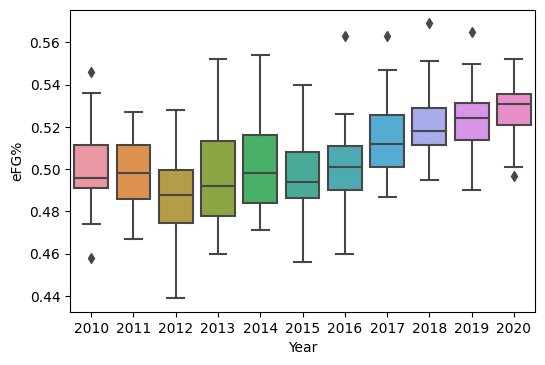

In [11]:
from graphs import *
from data_analysis import *
from scraper import *
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
efg_vs_3pa()

From this figure, it appears that median eFG% has risen over the years, thus showing that three-pointers heavy playstyles lead to greater offensive efficiency. Also notable is that in the three most recent years, the IQR has decreased, which suggests that three-point heavy playstyles lead to more consistent offensive efficiency than styles favored earlier in the 2010s.

### Changes in Playstyle During Playoffs
The next piece of information that we wanted to investigate was the alleged difference in playstyles between playoffs and regular season. If the assumptions are right, both %3PA and %3PM should be lower than regular season numbers.

To compare these stats, we will be calling the `playoffs_versus_season` function from `graphs.py`. This function is a wrapper function that feeds data into `seaborn_plots_silent`. This function will display a box and whisker plot for the league average %3PM and %3PA for each of the last ten seasons. the wrapper function will then create subplots to display both playoffs and regular season averages for %3PM and %3PA (total of four plots).

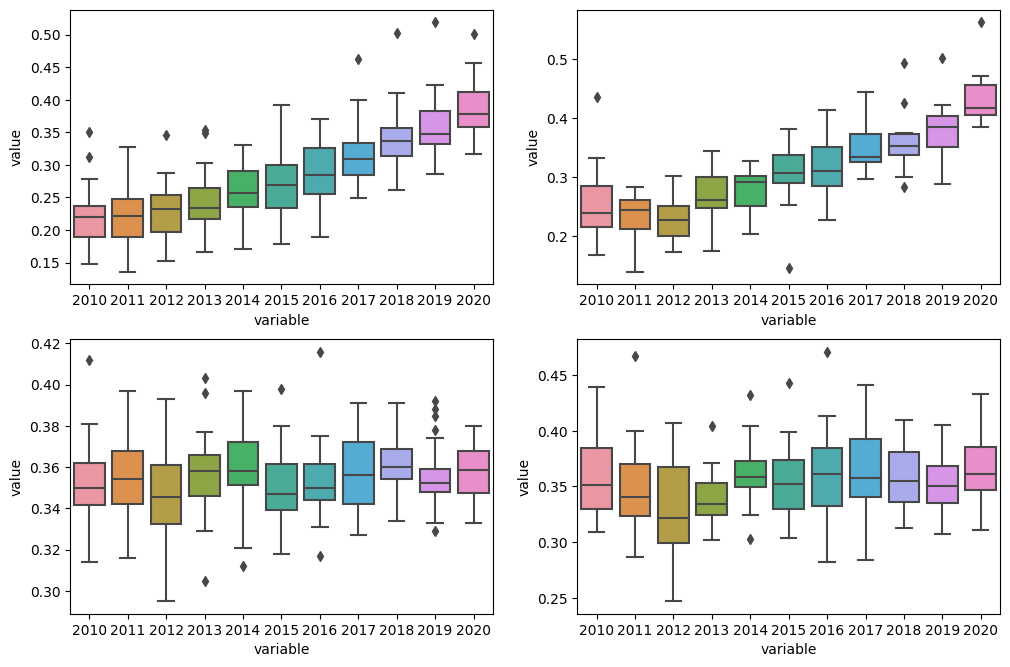

In [12]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

playoffs_versus_season()

### Corellation with Winning
Now that we have seen the effect on offensive efficiency and have established the baseline that 3-point shooting does not change in the playoffs, we will move on to the final step of data collection: analyzing the effect that three-point shooting has on winning games.

To establish a baseline for what to expect, we will first look at regular season correlation, then move into the playoffs.

#### Regular Season Data
To compare a statistic to win percentage, we will use the `win_compare` function. This uses the output from the `get_win_data` function in the scraper, that saves CSVs to the 'win-loss' folder (output of a few lines shown below).


In [13]:
# 5 lines of sample data for 2010
pd.read_csv('Data/win-loss/all_records_2010.csv')[0:5]

,Unnamed: 0,0,1
0,Atlanta Hawks,53,29
1,Boston Celtics,50,32
2,Brooklyn Nets,12,70
3,Charlotte Bobcats,44,38
4,Chicago Bulls,41,41


Using this data, we will construct a comparison between win percentage and %3PA, then construct a comparison between win percentage and %3PM

In [18]:
# Comparing data in 2019
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
win_compare(2019, "Field_Goals_Attempted_3PA", False, "Win Percentage", "%3PA")
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
win_compare(2019, "Field_Goals_3P", False, "Win Percentage", "%3PM")

TypeError: cannot convert the series to <class 'int'>

<Figure size 800x600 with 0 Axes>

In 2019, there was a single outlier in %3PA, but when removing this outlier from the data, it becomes clear that there seems to be no correlation between win percentage and %3PA. However, when looking at the win percentage vs %3PM, there does seem to be a positive correlation, albeit a weak one. In order to make sure that this trend is consistent throughout the data, we will calculate the r^2 value for this season and seasons prior and see how they align.

In [22]:
win_compare_r_squared("Field_Goals_3P")
win_compare_r_squared("Field_Goals_Attempted_3PA")

R^2 values for Field_Goals_3P
R^2 values for Field_Goals_Attempted_3PA


{'2010': 0.0014,
 '2011': 0.0185,
 '2012': 0.0176,
 '2013': 0.1104,
 '2014': 0.097,
 '2015': 0.1871,
 '2016': 0.0473,
 '2017': 0.107,
 '2018': 0.0758,
 '2019': 0.0378,
 '2020': 0.0362}

Calculating the r^2 values for each year shows that there is a correlation for %3PM and that there is none for %3PM. It also shows that the correlation between %3PM and winning has had an interesting trend. Between 2010 and 2014, correlation was low. Then, between 2015 and 2017, there was a spike in correlation. Between 2018 and 2020, the time frame during which %3PA spiked the most, the correlation decreased further. 

#### Postseason Data
To observe this data in the postseason, we have to slightly change our comparisons. In the regular season, comparing data against win percentage made sense, but for playoffs data, we are trying to observe correlation between making it farther in the playoffs and three-point statistics, not the correlation between win percentage and three-point statistics. The distinction between the two is important because there could be cases in which teams that win less overall rounds could have higher win percentages than teams that win more rounds. For example, a team that wins the first round 4-0 and then loses the second round 3-4 would have a win percentage of 63.4%. Meanwhile, a team that wins the championship by winning every round 4-3 would have a win percentage of 57.1%. 

The metric we will be using to replace win percentage is the number of playoffs rounds won. With our metric, a team that was eliminated in the first round would have a rounds won value of 0, while the team that won the championship would have a rounds won value of 4. The function `get_playoffs_series_won` in the scraper saves the team name and number of playoffs won to CSVs in the'playoffs_outcome' folder (a few lines of output shown below).

In [6]:
# 5 lines of the dataframe returned by get_playoff_series_won in 2010
pd.read_csv('Data/playoffs_outcome/playoffs_2010.csv')[0:5]

,Unnamed: 0,0
0,Los Angeles Lakers,4
1,Boston Celtics,3
2,Orlando Magic,2
3,Phoenix Suns,2
4,Cleveland Cavaliers,1


We will be using an interactive bar chart to display the average %3PA and %3PM of teams that had the same rounds won value. In this case, we are comparing team performance to %3PA and %3PM during playoffs games.

In [23]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(playoff_3p_chart, year=widgets.IntSlider(min=2010, max=2020, step=1), playoffs=fixed(True))


interactive(children=(IntSlider(value=2010, description='year', max=2020, min=2010), Output()), _dom_classes=(…

<function graphs.playoff_3p_chart(year, playoffs)>

From the above plots, it is clear that there is no overall trend linking three-point shooting stats to playoff performance. In 2016, %3PA seems to initially dip as the rounds go on, then increased during the last two rounds, while %3PM tends to increase as playoffs outcome gets better. In 2012, the correlation is much less clear, as it appears the teams that won three rounds shot three-pointers wiht the best efficiency (and volume), while the team that actually won the championship shot at the worst efficiency. The conclusion from this data is that there is no clear correlation that holds up over the years, but it is rare for the championship team to have either the highest average %3PM or the highest average %3PA. 

### Edge Case Metric
The edge case metric (described in the Data section), was created to detect the correlation between three-pointers statistics and making the playoffs. To run this metric, we will use the `edge_cases_metric` function. The function itself can take in any statistic, but we will only be querying for the edge cases in %3PM and %3PA.

In [25]:
edge_cases_metric('Field_Goals_3P')

NameError: name 'edge_case_metric' is not defined

The results of the edge case metric are unsurprising. It appears that teams top-5 in %3PM make the  playoffs more than teams bottom-5 in %3PM every season, with the average difference in number of top-5 teams and number of bottom-5 teams qualiying being 2.82. When looking at teams top-5 and bottom-5 in %3PA, there is much less of a correlation, with the average difference between top-5 teams and bottom-5 teams qualifying being 1.36. Still, it is notable that in no season were there more teams bottom-5 in %3PA or %3PM than there were teams top-5 in those statistics. 

## Interpretation
The data we collected seems to tell two different stories: one of the effectiveness of three-point shooting during the regular season, and one of the effectiveness of three-point shooting in the playoffs.

During the regular season, it appears that teams that shoot more three-pointers do not necessarily perform better, but teams that make more of their three-point attempts do. While we cannot assume causation from this data, it demonstrates that chucking up more three-pointers may not be effective if they aren't being made at a good efficiency. The r-squared values of %3PM against win percentage also tell an interesting story. The years during which correlation was highest, 2015 to 2017, median %3PA was in the high 20 and low 30 percents. Years prior to and after this period showed lower correlation values. The decrease in correlation between %3PM and win percentage in recent years may demonstrate that when shooting a higher volume of three-pointers, efficiency is less important to winning, but we cannot draw this conclusion as we cannot assume causation between this data. \
The edge case metric shows that while very few teams with bottom-5 %3PM make the playoffs, more teams with bottom-5 %3PA make the playoffs than teams with top-5 %3PA in every year, further reinforcing the conclusion that chucking three-pointers does not lead to better regular season outcomes or playoffs records. 


During the playoffs, the story of three-point shooting is quite different. While neither %3PA nor %3PM vary from regular season averages, there is no consistent correlation between either of these stats and playoffs outcome. To understand why there is no correlation, we would have to do further analysis and find stats that do have a correlation. Furthermore, it may be helpful to look at three-point statistics by round rather than as an average. More specifically, rather than averaging the %3PA and %3PM of every team that lost in the first round and so on, look at each playoff matchup and compare each team's three-point stats within that round only. It also may be helpful to increase granularity and look at individual playoffs games. 